# Лабораторая работа 4.03V
# Кольца Ньютона

## Выполнил: Коняхин Всеволод Владимирович, M32051, Вариант №10

## Краткие теоретические сведения
В этой работе рассматривается интерференционная картина колец Ньютона, получаемая методом деления амплитуд, когда возникает оптическая разность хода.

## Цель работы
Изучение интерференционной картины колец Ньютона. Определение радиуса кривизны плоско-выпуклой линзы с помощью
интерференционной картины колец Ньютона.

In [229]:
import sympy
import scipy
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
%matplotlib inline

## Монохроматический источник, показатель преломления среды $n_1$

Длина волны $\lambda_1 = 645 $ нм, показатель преломления среды $n_1 = 1.4$    

In [191]:
lambd = 645 * 10 ** (-9)
n_1 = 1.4

#### Вирутальная установка:

![Виртуальная установка](img/intensivity_n1.png)

#### Интенсивность от радиальной координаты $I_1(r)$

In [192]:
file_n1 = 'data/intensity_n1.csv'
n1_df = pd.read_csv(file_n1, sep=';', index_col=False)

In [193]:
I = np.array([float(element.replace(',', '.')) for element in np.array(n1_df['I'])])
r = np.array([float(element.replace(',', '.')) for element in np.array(n1_df['r, mm'])])

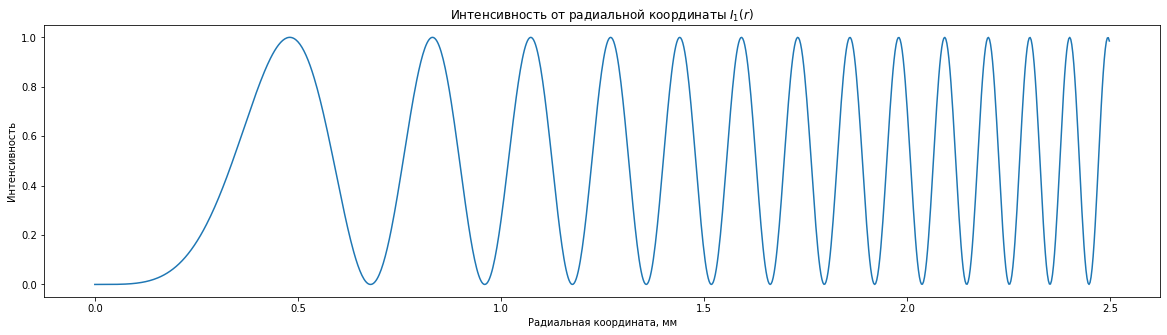

In [194]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Интенсивность от радиальной координаты $I_1(r)$')
ax.set_ylabel('Интенсивность')
ax.set_xlabel('Радиальная координата, мм')
ax.plot(r, I)
plt.show()

#### Определим радиусы светлых и темных колец:

In [195]:
# найдем локальные минимумы и максимумы
maxm = argrelextrema(I, np.greater)
minm = argrelextrema(I, np.less)

In [196]:
dark_rings_radiuses = r[minm]
light_rings_radiuses = r[maxm]

#### Радиусы светлых колец:

In [197]:
for r in light_rings_radiuses:
    print(str(r) + ' мм', end=', ')

0.48 мм, 0.8325 мм, 1.0725 мм, 1.27 мм, 1.44 мм, 1.5925 мм, 1.73 мм, 1.86 мм, 1.98 мм, 2.0925 мм, 2.2 мм, 2.3025 мм, 2.4 мм, 2.495 мм, 

#### Радиусы темных колец:

In [198]:
for r in dark_rings_radiuses:
    print(str(r) + ' мм', end=', ')

0.68 мм, 0.96 мм, 1.175 мм, 1.3575 мм, 1.5175 мм, 1.6625 мм, 1.795 мм, 1.92 мм, 2.0375 мм, 2.1475 мм, 2.25 мм, 2.3525 мм, 2.4475 мм, 

#### Построение графиков зависимостей квадратов радиусов колец от порядкового номера:

In [199]:
dark_rings_radiuses_squared = dark_rings_radiuses ** 2
light_rings_radiuses_squared = light_rings_radiuses ** 2

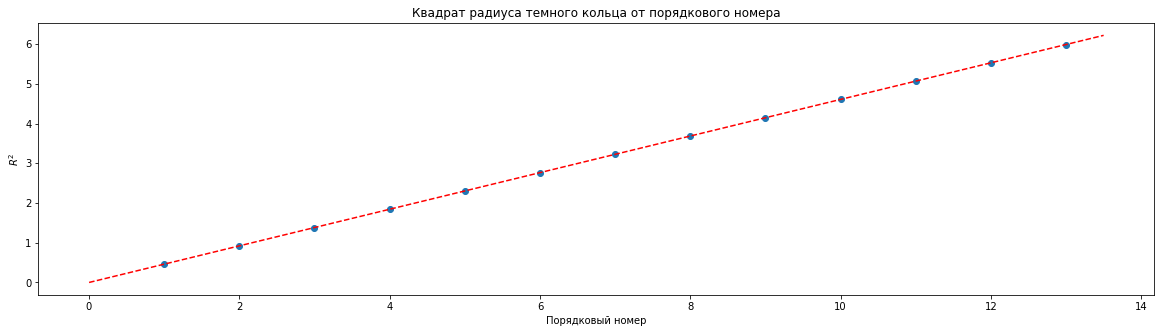

In [200]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Квадрат радиуса темного кольца от порядкового номера')
ax.set_ylabel('$R^2$')
ax.set_xlabel('Порядковый номер')
k, b = np.polyfit([i for i in range(1, len(dark_rings_radiuses_squared) + 1)], dark_rings_radiuses_squared, 1)
x = np.linspace(-b/k, 13.5, 6)
ax.scatter([i for i in range(1, len(dark_rings_radiuses_squared) + 1)], dark_rings_radiuses_squared)
ax.plot(x, np.polyval([k, b], x), 'r--')
plt.show()

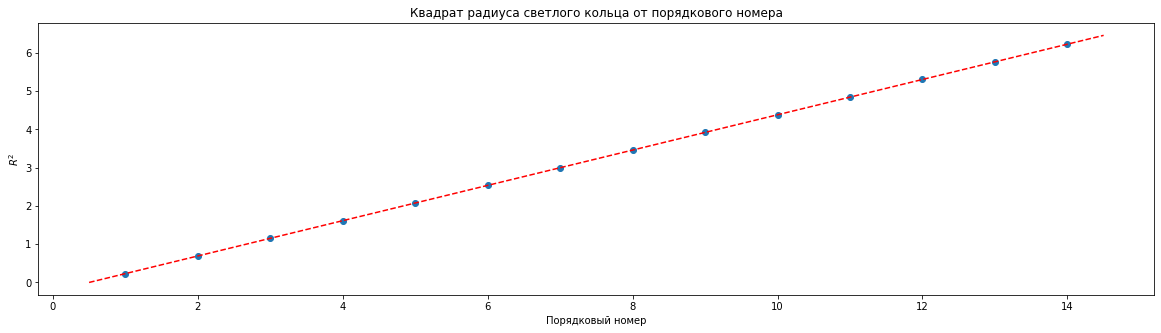

In [204]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Квадрат радиуса светлого кольца от порядкового номера')
ax.set_ylabel('$R^2$')
ax.set_xlabel('Порядковый номер')
k, b = np.polyfit([i for i in range(1, len(light_rings_radiuses_squared) + 1)], light_rings_radiuses_squared, 1)
x = np.linspace(-b/k, 14.5, 6)
ax.scatter([i for i in range(1, len(light_rings_radiuses_squared) + 1)], light_rings_radiuses_squared)
ax.plot(x, np.polyval([k, b], x), 'r--')
plt.show()

Как видно из графиков, получилась линейная зависимость!

#### Расчет радиуса кривизны линзы:

Формула: $R = \frac{r_m^2 - r_n^2}{(m - n) \lambda}$, где $m$ и $n$ различные порядки интерференции для темных колец

In [205]:
def calculate_сurvature_radius(r_m, r_n, m, n, lambd):
    radius = (r_m ** 2 - r_n ** 2) / ((m - n) * lambd)
    return radius


def calculate_сurvature_radius_range(dark_rings_radiuses, lambd):
    n_rings = len(dark_rings_radiuses)
    radiuses = []
    
    for start in range(n_rings):
        for end in range(start + 1, n_rings):
            rad = calculate_сurvature_radius(
                dark_rings_radiuses[start] * 10 ** (-3), 
                dark_rings_radiuses[end] * 10 ** (-3), 
                start, end, lambd)
            radiuses.append(rad)
            
            
    return np.mean(radiuses), np.std(radiuses)

In [206]:
сurvature_radius_mean, сurvature_radius_std = calculate_сurvature_radius_range(dark_rings_radiuses, lambd)

print('Радиус кривизны линзы: {:.3f} +- {:.3f} м'.format(сurvature_radius_mean, сurvature_radius_std))

Радиус кривизны линзы: 0.715 +- 0.003 м


## Монохроматический источник, показатель преломления среды $n_2$

Длина волны $\lambda_1 = 645 $ нм, показатель преломления среды $n_2 = 1.55$    

In [208]:
lambd = 645 * 10 ** (-9)
n_2 = 1.55

#### Вирутальная установка:

![Виртуальная установка](img/intensivity_n2.png)

#### Интенсивность от радиальной координаты $I_2(r)$

In [209]:
file_n2 = 'data/intensity_n2.csv'
n2_df = pd.read_csv(file_n2, sep=';', index_col=False)

In [210]:
I = np.array([float(element.replace(',', '.')) for element in np.array(n2_df['I'])])
r = np.array([float(element.replace(',', '.')) for element in np.array(n2_df['r, mm'])])

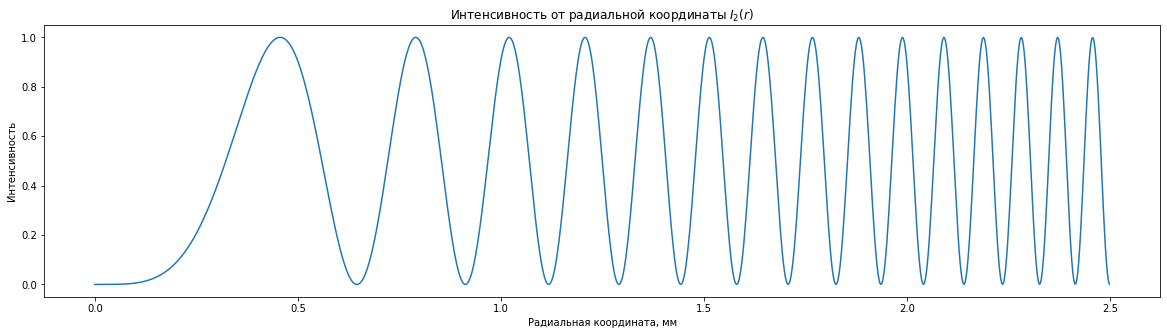

In [212]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Интенсивность от радиальной координаты $I_2(r)$')
ax.set_ylabel('Интенсивность')
ax.set_xlabel('Радиальная координата, мм')
ax.plot(r, I)
plt.show()

#### Определим радиусы светлых и темных колец:

In [213]:
# найдем локальные минимумы и максимумы
maxm = argrelextrema(I, np.greater)
minm = argrelextrema(I, np.less)

In [214]:
dark_rings_radiuses = r[minm]
light_rings_radiuses = r[maxm]

#### Радиусы светлых колец:

In [215]:
for r in light_rings_radiuses:
    print(str(r) + ' мм', end=', ')

0.455 мм, 0.79 мм, 1.02 мм, 1.2075 мм, 1.3675 мм, 1.5125 мм, 1.645 мм, 1.7675 мм, 1.88 мм, 1.9875 мм, 2.09 мм, 2.1875 мм, 2.28 мм, 2.37 мм, 2.4575 мм, 

#### Радиусы темных колец:

In [216]:
for r in dark_rings_radiuses:
    print(str(r) + ' мм', end=', ')

0.645 мм, 0.9125 мм, 1.1175 мм, 1.29 мм, 1.4425 мм, 1.58 мм, 1.7075 мм, 1.825 мм, 1.935 мм, 2.04 мм, 2.14 мм, 2.235 мм, 2.325 мм, 2.4125 мм, 

#### Построение графиков зависимостей квадратов радиусов колец от порядкового номера:

In [217]:
dark_rings_radiuses_squared = dark_rings_radiuses ** 2
light_rings_radiuses_squared = light_rings_radiuses ** 2

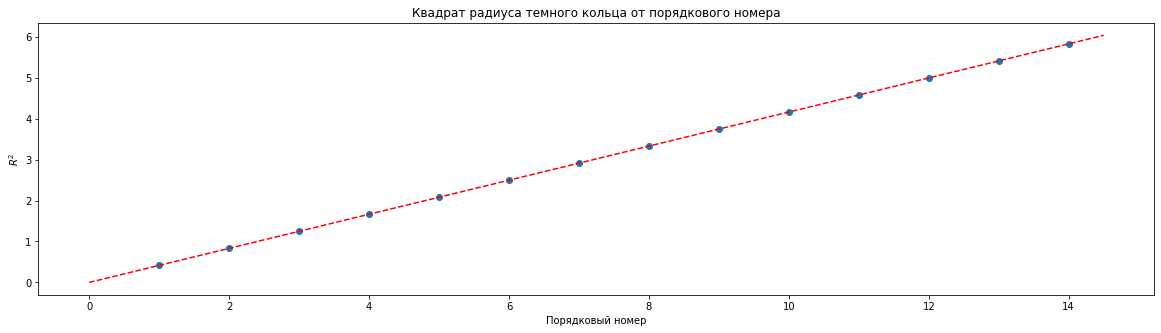

In [219]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Квадрат радиуса темного кольца от порядкового номера')
ax.set_ylabel('$R^2$')
ax.set_xlabel('Порядковый номер')
k, b = np.polyfit([i for i in range(1, len(dark_rings_radiuses_squared) + 1)], dark_rings_radiuses_squared, 1)
x = np.linspace(-b/k, 14.5, 6)
ax.scatter([i for i in range(1, len(dark_rings_radiuses_squared) + 1)], dark_rings_radiuses_squared)
ax.plot(x, np.polyval([k, b], x), 'r--')
plt.show()

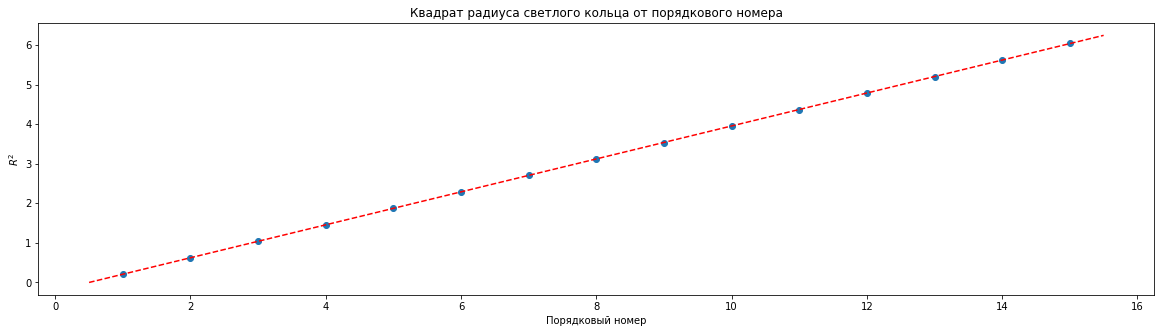

In [221]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Квадрат радиуса светлого кольца от порядкового номера')
ax.set_ylabel('$R^2$')
ax.set_xlabel('Порядковый номер')
k, b = np.polyfit([i for i in range(1, len(light_rings_radiuses_squared) + 1)], light_rings_radiuses_squared, 1)
x = np.linspace(-b/k, 15.5, 6)
ax.scatter([i for i in range(1, len(light_rings_radiuses_squared) + 1)], light_rings_radiuses_squared)
ax.plot(x, np.polyval([k, b], x), 'r--')
plt.show()

#### Расчет радиуса кривизны линзы:

In [222]:
сurvature_radius_mean, сurvature_radius_std = calculate_сurvature_radius_range(dark_rings_radiuses, lambd)

print('Радиус кривизны линзы: {:.3f} +- {:.3f} м'.format(сurvature_radius_mean, сurvature_radius_std))

Радиус кривизны линзы: 0.645 +- 0.002 м


## Бихроматическое излучение

Длина волны 1 $\lambda_1 = 645 $ нм, Длина волны 2 $\lambda_2 = 594 $ нм, показатель преломления среды $n_2 = 1.55$    

In [265]:
lambda_1 = 645 * 10 ** (-9)
lambda_2 = 594 * 10 ** (-9)
n_2 = 1.55

#### Вирутальная установка:

![Виртуальная установка](img/intensivity_two_waves.png)

![Виртуальная установка](img/intensivity_two_waves_pt2.png)

#### Построение графика распределения интенсивности $I_3(r)$:

In [266]:
file_n3 = 'data/intensity_two_waves.csv'
n3_df = pd.read_csv(file_n3, sep=';', index_col=False)

In [267]:
I = np.array([float(element.replace(',', '.')) for element in np.array(n3_df['I'])])
r = np.array([float(element.replace(',', '.')) for element in np.array(n3_df['r, mm'])])

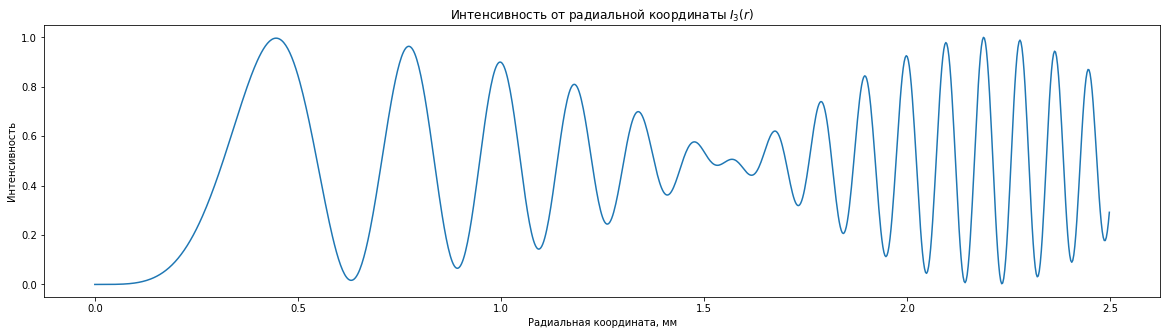

In [268]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Интенсивность от радиальной координаты $I_3(r)$')
ax.set_ylabel('Интенсивность')
ax.set_xlabel('Радиальная координата, мм')
ax.plot(r, I)
plt.show()

#### Значения видности $V(\Delta)$:

$V_{эксп}(r) = \frac{I_{max} - I_{min}}{I_{max} + I_{min}}$       

In [303]:
def calculate_experimental_visibility(i_max, i_min):
    visib = (i_max - i_min) / (i_max + i_min)
    return visib

$V_{теор}(r) = \alpha * |sinc\left[\frac{\Delta w}{2c} \Delta_{opt}\right]|$       
$\Delta_{opt} = \frac{r^2}{R_{lens}} + \frac{\lambda}{2} \approx \frac{r^2}{R_{lens}}$

In [308]:
def calculate_theoretical_visibility(w_range, r, R_lens, alpha=1.):
    light_speed = 299792458
    delta_opt = r ** 2 / R_lens
    visib = alpha * abs(np.sinc(w_range / (2 * light_speed) * delta_opt))
    return visib

In [309]:
maxm = argrelextrema(I, np.greater)
minm = argrelextrema(I, np.less)

In [310]:
theoretical_points = []
experimental_points = []

In [311]:
for min_idx, max_idx in zip(list(minm[0]), list(maxm[0])):
    min_radius, max_radius = r[min_idx], r[max_idx]
    min_intensity, max_intensity = I[min_idx], I[max_idx]
        
    theor_visib = calculate_theoretical_visibility(
        lambda_1 - lambda_2, (min_radius + max_radius) / 2, сurvature_radius_mean)
    exp_visib = calculate_experimental_visibility(
        max_intensity, min_intensity)
    
    theoretical_points.append(theor_visib)
    experimental_points.append(exp_visib)

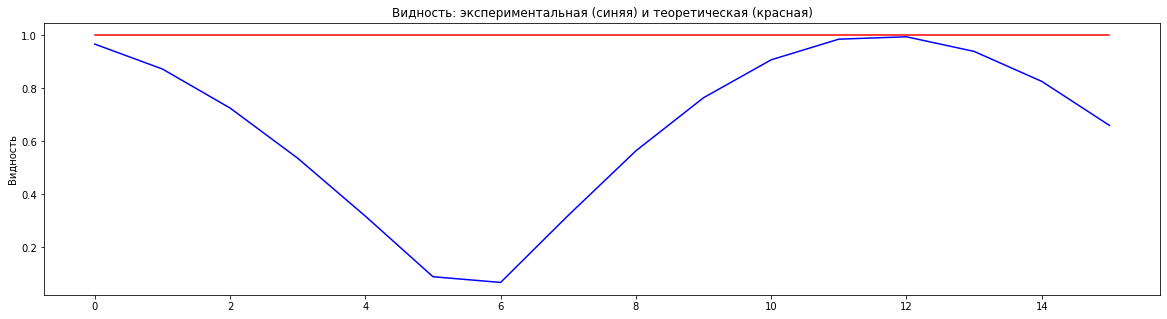

In [318]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Видность: экспериментальная (синяя) и теоретическая (красная)')
ax.set_ylabel('Видность')
ax.plot([i for i in range(len(theoretical_points))], theoretical_points, 'r')
ax.plot([i for i in range(len(experimental_points))], experimental_points, 'b')
plt.show()

## Однородный сплошной спектр

Длина волны 1 $\lambda_1 = 594 $ нм, Длина волны 2 $\lambda_2 = 645 $ нм, показатель преломления среды $n_2 = 1.55$    

In [ ]:
lambda_1 = 594 * 10 ** (-9)
lambda_2 = 645 * 10 ** (-9)
n_2 = 1.55

#### Вирутальная установка:

![Виртуальная установка](img/intensivity_range.png)

![Виртуальная установка](img/intensivity_range_pt2.png)

In [319]:
file_n4 = 'data/intensity_period.csv'
n4_df = pd.read_csv(file_n4, sep=';', index_col=False)

In [320]:
I = np.array([float(element.replace(',', '.')) for element in np.array(n4_df['I'])])
r = np.array([float(element.replace(',', '.')) for element in np.array(n4_df['r, mm'])])

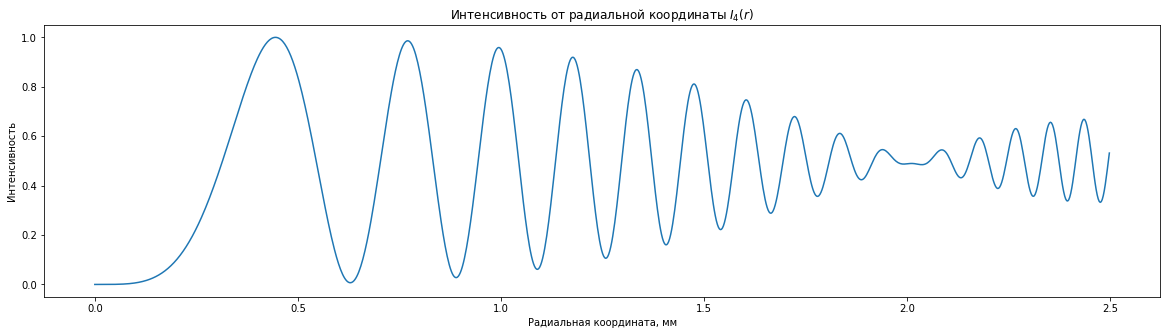

In [321]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Интенсивность от радиальной координаты $I_4(r)$')
ax.set_ylabel('Интенсивность')
ax.set_xlabel('Радиальная координата, мм')
ax.plot(r, I)
plt.show()

#### Значения видности $V(\Delta)$:

In [322]:
maxm = argrelextrema(I, np.greater)
minm = argrelextrema(I, np.less)

In [323]:
theoretical_points = []
experimental_points = []

In [324]:
for min_idx, max_idx in zip(list(minm[0]), list(maxm[0])):
    min_radius, max_radius = r[min_idx], r[max_idx]
    min_intensity, max_intensity = I[min_idx], I[max_idx]
        
    theor_visib = calculate_theoretical_visibility(
        lambda_1 - lambda_2, (min_radius + max_radius) / 2, сurvature_radius_mean)
    exp_visib = calculate_experimental_visibility(
        max_intensity, min_intensity)
    
    theoretical_points.append(theor_visib)
    experimental_points.append(exp_visib)

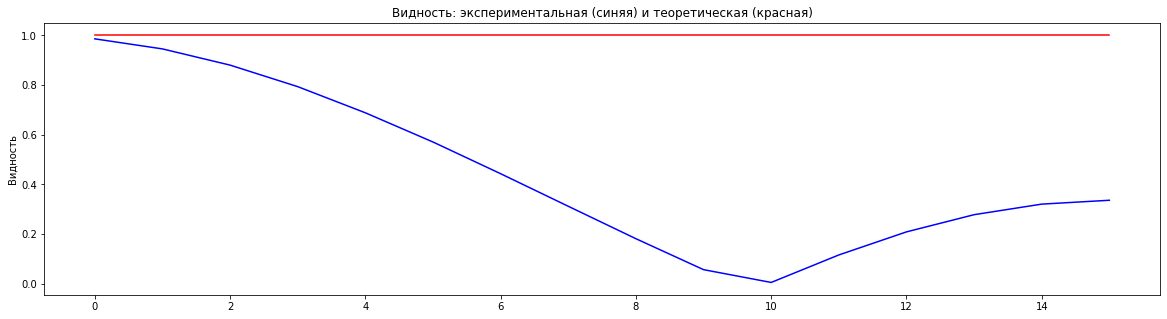

In [325]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Видность: экспериментальная (синяя) и теоретическая (красная)')
ax.set_ylabel('Видность')
ax.plot([i for i in range(len(theoretical_points))], theoretical_points, 'r')
ax.plot([i for i in range(len(experimental_points))], experimental_points, 'b')
plt.show()

## Выводы и анализ результатов работы

В ходе работы была рассмотренна интерференционная картина колец Ньютона. В частности, для монохроматического источника с двумя разными показателями преломления среды были построены графики зависимости интенсивности от радиальной координаты, найдены радиусы темных и светлых колец, продемонстрирована линейная зависимость квадрата радиуса колец к порядковому номеру. Так же были найдены радиусы кривизны для линзы. Для бихроматического излучения и однородного сплошного спектра были найдены зависимости интенсивности от радиальной координаты, теоретические и экспериментальные видности. 